In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import datetime
import os

from matplotlib.ticker import FuncFormatter
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from os import path
from matplotlib import ticker

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

# Table.III Comparison of performance

In [2]:
interval_stat=1000

Table_1 = 'successful'
Table_2 = 'reward'
cwd = os.getcwd()

def prep_stat (cwd, interval_stat):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                x = df_t
                x['interval'] = np.ceil((x['episode'])/interval_stat)
                x_rewards = x.groupby(['interval'], as_index=False).agg({'successful':np.sum})
                temp = {'reward':df_t['reward'].mean(), "successful":x_rewards['successful'].mean()}
                df = df.append(temp, ignore_index=True)
    return df.mean()

def process_table(dir_M, interval_stat):
    cwd = os.getcwd()
    dqn = prep_stat( cwd + dir_M +str("/dqn"), interval_stat)
    bo = prep_stat(cwd + dir_M +str("/bodqn"), interval_stat)
    ba = prep_stat(cwd + dir_M +str("/badqn"), interval_stat)
    noisynet = prep_stat(cwd+ dir_M + str("/noisynet"), interval_stat)
    b2 = prep_stat(cwd+ dir_M + str("/b2dqn"), interval_stat)
    bo_pr = prep_stat(cwd + dir_M +str("/bodqn_pr"), interval_stat)
    return dqn, bo, ba, noisynet, bo_pr, b2 

dir_M = "/tab_M4"
M4_dqn, M4_bo, M4_ba, M4_noisynet, M4_bo_pr, M4_b2  = process_table(dir_M, interval_stat)
dir_M = "/tab_M8"
M8_dqn, M8_bo, M8_ba, M8_noisynet, M8_bo_pr, M8_b2  = process_table(dir_M, interval_stat)
dir_M = "/tab_M16"
M16_dqn, M16_bo, M16_ba, M16_noisynet, M16_bo_pr, M16_b2  = process_table(dir_M, interval_stat)
dir_M = "/tab_M32"
M32_dqn, M32_bo, M32_ba, M32_noisynet, M32_bo_pr, M32_b2 = process_table(dir_M, interval_stat)
dir_M = "/tab_M64"
M64_dqn, M64_bo, M64_ba, M64_noisynet, M64_bo_pr, M64_b2  = process_table(dir_M, interval_stat)

T_M4 = pd.DataFrame()
T_M4['Algorithm'] = ['DQN','BoDQN','BaDQN','NoisyDQN','RPFEP','B2DQN']
T_M4['M'] = 4
T_M4[Table_1] = [M4_dqn[Table_1].mean(), M4_bo[Table_1].mean(), M4_ba[Table_1].mean(), M4_noisynet[Table_1].mean(), M4_bo_pr[Table_1].mean(), M4_b2[Table_1].mean()]
T_M4[Table_2] = [M4_dqn[Table_2].mean(), M4_bo[Table_2].mean(), M4_ba[Table_2].mean(), M4_noisynet[Table_2].mean(), M4_bo_pr[Table_2].mean(), M4_b2[Table_2].mean()]
T_M8 = pd.DataFrame()
T_M8['Algorithm'] = ['DQN','BoDQN','BaDQN','NoisyDQN','RPFEP','B2DQN']
T_M8['M'] = 8
T_M8[Table_1] = [M8_dqn[Table_1].mean(), M8_bo[Table_1].mean(), M8_ba[Table_1].mean(), M8_noisynet[Table_1].mean(), M8_bo_pr[Table_1].mean(), M8_b2[Table_1].mean()]
T_M8[Table_2] = [M8_dqn[Table_2].mean(), M8_bo[Table_2].mean(), M8_ba[Table_2].mean(), M8_noisynet[Table_2].mean(), M8_bo_pr[Table_2].mean(), M8_b2[Table_2].mean()]
T_M16 = pd.DataFrame()
T_M16['Algorithm'] = ['DQN','BoDQN','BaDQN','NoisyDQN','RPFEP','B2DQN']
T_M16['M'] = 16
T_M16[Table_1] = [M16_dqn[Table_1].mean(), M16_bo[Table_1].mean(), M16_ba[Table_1].mean(), M16_noisynet[Table_1].mean(), M16_bo_pr[Table_1].mean(), M16_b2[Table_1].mean()]
T_M16[Table_2] = [M16_dqn[Table_2].mean(), M16_bo[Table_2].mean(), M16_ba[Table_2].mean(), M16_noisynet[Table_2].mean(), M16_bo_pr[Table_2].mean(), M16_b2[Table_2].mean()]
T_M32 = pd.DataFrame()
T_M32['Algorithm'] = ['DQN','BoDQN','BaDQN','NoisyDQN','RPFEP','B2DQN']
T_M32['M'] = 32
T_M32[Table_1] = [M32_dqn[Table_1].mean(), M32_bo[Table_1].mean(), M32_ba[Table_1].mean(), M32_noisynet[Table_1].mean(), M32_bo_pr[Table_1].mean(), M32_b2[Table_1].mean()]
T_M32[Table_2] = [M32_dqn[Table_2].mean(), M32_bo[Table_2].mean(), M32_ba[Table_2].mean(), M32_noisynet[Table_2].mean(), M32_bo_pr[Table_2].mean(),  M32_b2[Table_2].mean()]
T_M64 = pd.DataFrame()
T_M64['Algorithm'] = ['DQN','BoDQN','BaDQN','NoisyDQN','RPFEP','B2DQN']
T_M64['M'] = 64
T_M64[Table_1] = [M64_dqn[Table_1].mean(), M64_bo[Table_1].mean(), M64_ba[Table_1].mean(), M64_noisynet[Table_1].mean(), M64_bo_pr[Table_1].mean(), M64_b2[Table_1].mean()]
T_M64[Table_2] = [M64_dqn[Table_2].mean(), M64_bo[Table_2].mean(), M64_ba[Table_2].mean(), M64_noisynet[Table_2].mean(), M64_bo_pr[Table_2].mean(), M64_b2[Table_2].mean()]               
T = pd.concat([T_M4,T_M8,T_M16,T_M32,T_M64])
T = T.groupby(['Algorithm', 'M'], as_index=False).agg({Table_1:np.mean, Table_2:np.mean})
T.pivot_table(values=[Table_1, Table_2], index=['Algorithm'], columns=['M'])

reward                                             successful  \
M                 4          8          16         32         64         4    
Algorithm                                                                     
B2DQN      66.877700  53.745793  43.402257  34.623367  28.012063   2.313333   
BaDQN      62.901790  51.138277  41.580873  33.826397  26.756510   1.560000   
BoDQN      63.240757  51.473323  42.458347  34.394713  28.182680   0.483333   
DQN        62.787473  51.325277  41.803023  34.268140  27.308260   0.386667   
NoisyDQN   64.702803  52.421707  42.463470  34.584330  27.821863   1.600000   
RPFEP      63.477900  51.597987  42.061237  34.513840  28.029777   0.636667   

                                                   
M                8         16        32        64  
Algorithm                                          
B2DQN      1.306667  0.666667  0.380000  0.226667  
BaDQN      0.953333  0.116667  0.033333  0.220000  
BoDQN      0.220000  0.150000  0.080000  0.053333  
DQN        0.230000  0.153333  0.090000  0.056667  
NoisyDQN   0.813333  0.530000  0.256667  0.170000  
RPFEP      0.326667  0.196667  0.083333  0.086667

# Figure 2. The average of cumulative convergence episodes.

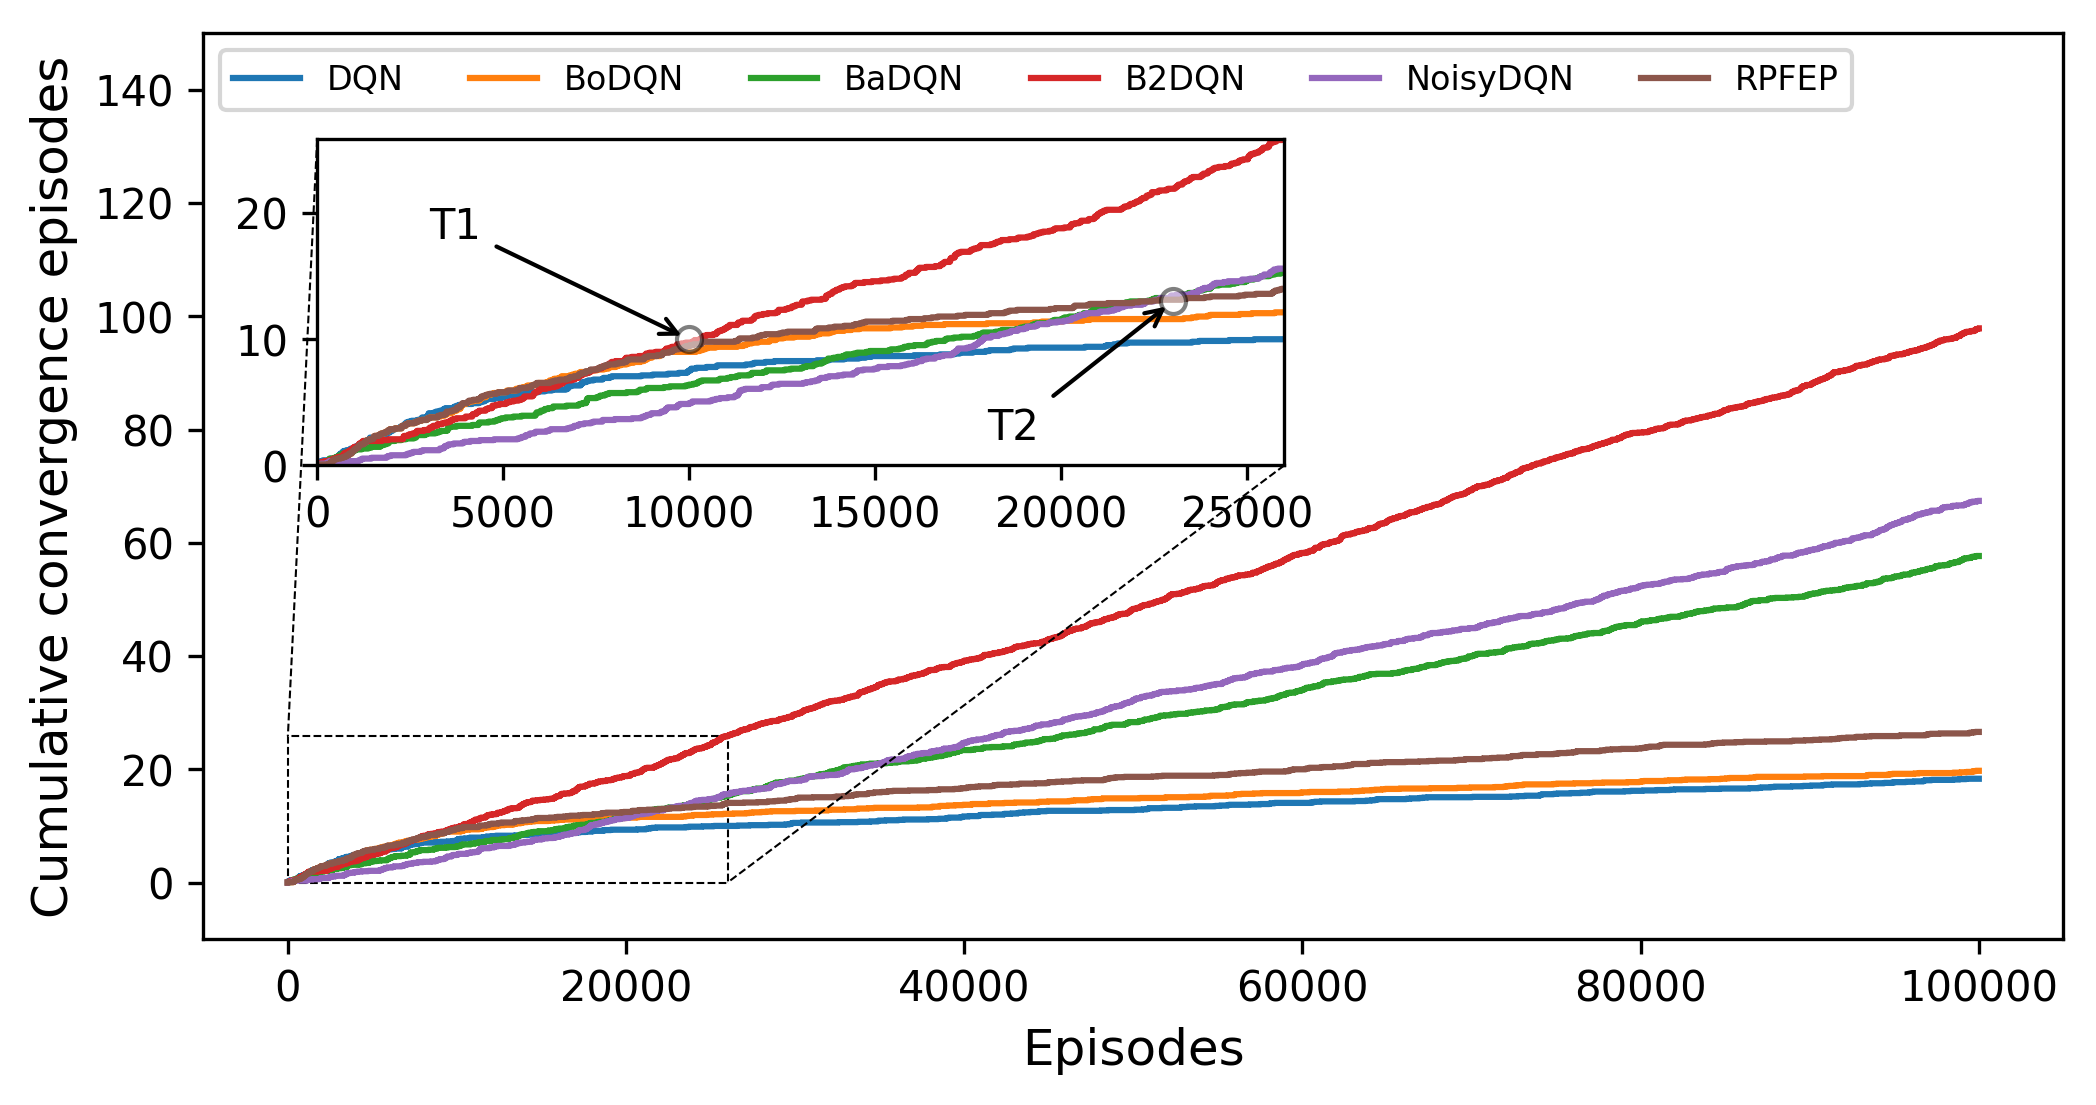

In [3]:
cwd = os.getcwd()
interval_stat = 1
title = 'successful_cum'

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

def prep (x):
    x['interval'] = np.ceil((x['episode'])/interval_stat)
    x_rewards = x.groupby(['interval'], as_index=False).agg({'reward':np.mean, 'timesteps':np.sum, 'successful':np.sum})
    x_rewards['valid_actions'] = x_rewards['timesteps'] - interval_stat
    x_conv = x[x['timesteps']==10].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['reword_mean_cum'] = x_stat['reward'].cumsum()
    x_stat['valid_actions_cum'] = x_stat['valid_actions'].cumsum()
    x_stat['successful_cum'] = x_stat['successful'].cumsum()
    return x_stat

def prep_stat (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(prep(df_t))
    return df.groupby(['interval'], as_index=False).mean()

dqn = prep_stat(cwd+str("/fig_dqn"))
bo = prep_stat(cwd+str("/fig_bodqn"))
ba = prep_stat(cwd+str("/fig_badqn"))
noisynet = prep_stat(cwd+str("/fig_noisynet"))
b2 = prep_stat(cwd+str("/fig_b2dqn"))
rpfep = prep_stat(cwd+str("/fig_rpfep"))

fig, ax1 = plt.subplots()
plt.ylim(-10,150)
axins = inset_axes(ax1,width="40%",height="30%",loc='lower left',
                  bbox_to_anchor=(0.05,0.5,1.3,1.2),
                  bbox_transform=ax1.transAxes)


ax1.plot(dqn['interval'], dqn[title], label='DQN')
ax1.plot(bo['interval'], bo[title], label='BoDQN')
ax1.plot(ba['interval'], ba[title], label='BaDQN')
ax1.plot(b2['interval'], b2[title], label='B2DQN')
ax1.plot(noisynet['interval'], noisynet[title], label='NoisyDQN')
ax1.plot(rpfep['interval'], rpfep[title], label='RPFEP')


axins.plot(dqn['interval'], dqn[title], label='DQN')
axins.plot(bo['interval'], bo[title], label='BoDQN')
axins.plot(ba['interval'], ba[title], label='BaDQN')
axins.plot(b2['interval'], b2[title], label='B2DQN')
axins.plot(noisynet['interval'], noisynet[title], label='NoisyDQN')
axins.plot(rpfep['interval'], rpfep[title], label='RPFEP')

zone_left=0
zone_right=26000
x_ratio=0
y_ratio=0

xlim0_b2=b2['interval'][zone_left]-(b2['interval'][zone_right]-b2['interval'][zone_left])*x_ratio
xlim1_b2=b2['interval'][zone_right]+(b2['interval'][zone_right]-b2['interval'][zone_left])*x_ratio
y=np.hstack((b2[title][zone_left:zone_right]))
ylim0_b2=np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1_b2=np.max(y)+(np.max(y)-np.min(y))*y_ratio

axins.set_xlim(xlim0_b2, xlim1_b2)
axins.set_ylim(ylim0_b2, ylim1_b2)

mark_inset(ax1, axins, loc1=2,loc2=4,fc="none", ec='k', lw=0.5, ls='--')

ax1.legend(prop={'size': 8}, loc='upper left', ncol=7, numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)

axins.plot(10000, 10, marker='o', color='k',alpha=0.5, markerfacecolor='white')
axins.plot(23000, 13, marker='o', color='k',alpha=0.5, markerfacecolor='white')
plt.annotate("T1", (10000,10), xycoords='data',
             xytext=(3000, 18), 
             arrowprops=dict(arrowstyle='->'))
plt.annotate("T2", (23000,13), xycoords='data',
             xytext=(18000, 2), 
             arrowprops=dict(arrowstyle='->')) 
# plt.savefig('CCE.png')


plt.show()

# Figure 3. Average episode reward.

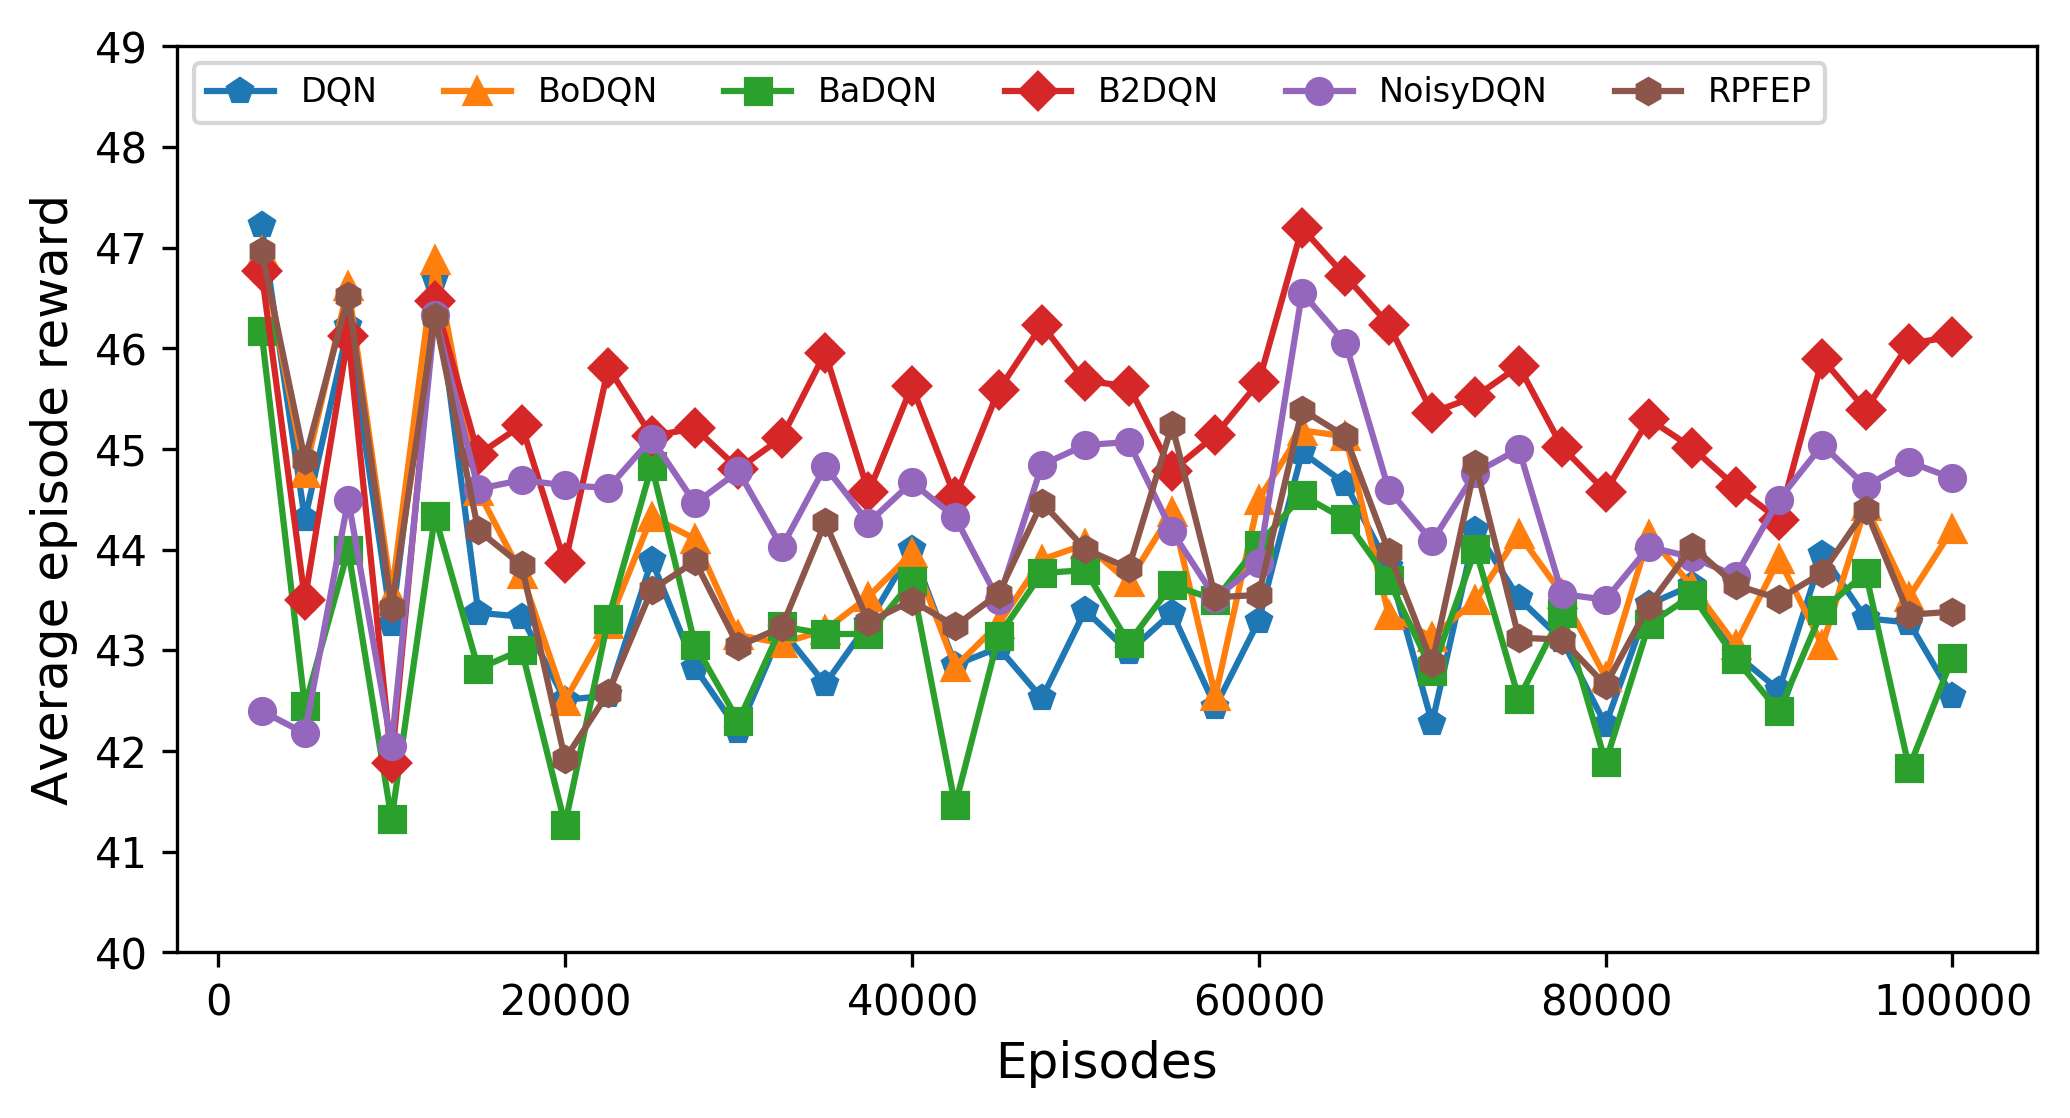

In [4]:
cwd = os.getcwd()
interval_stat = 2500
title = 'reward' 

def prep (x):
    x['interval'] = np.ceil((x['episode'])/interval_stat)    
    x_rewards = x.groupby(['interval'], as_index=False).agg({'reward':np.mean, 'timesteps':np.sum, 'successful':np.sum})
    x_rewards['valid_actions'] = x_rewards['timesteps'] - interval_stat
    x_conv = x[x['timesteps']==10].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['reword_mean_cum'] = x_stat['reward'].cumsum()
    x_stat['valid_actions_cum'] = x_stat['valid_actions'].cumsum()
    x_stat['successful_cum'] = x_stat['successful'].cumsum()
    return x_stat

def prep_stat (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(prep(df_t))
    return df.groupby(['interval'], as_index=False).mean()

b2_cwd = cwd+str("/fig_b2dqn")
ba_cwd = cwd+str("/fig_badqn")
bo_cwd = cwd+str("/fig_bodqn")
noisynet_cwd = cwd+str("/fig_noisynet")
dqn_cwd = cwd+str("/fig_dqn")
rpfep_cwd = cwd+str("/fig_rpfep")

dqn = prep_stat(dqn_cwd)
bo = prep_stat(bo_cwd)
ba = prep_stat(ba_cwd)
noisynet = prep_stat(noisynet_cwd)
b2 = prep_stat(b2_cwd)
rpfep = prep_stat(rpfep_cwd)

fig, ax1 = plt.subplots()
ax1.plot(dqn['interval'], dqn[title], marker='p', label='DQN')
# ax1.plot(ddqn['interval'], ddqn[title], marker='v', label='DDQN')
ax1.plot(bo['interval'], bo[title], marker='^', label='BoDQN')
ax1.plot(ba['interval'], ba[title], marker='s', label='BaDQN')
ax1.plot(b2['interval'], b2[title], marker='D', label='B2DQN')
ax1.plot(noisynet['interval'], noisynet[title], marker='o', label='NoisyDQN')
ax1.plot(rpfep['interval'], rpfep[title], marker='h', label='RPFEP')

plt.ylim(40,49)
ax1.legend(prop={'size': 8}, loc='upper left', ncol=7, numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Average episode reward', fontsize=12)

x_up = 100000/interval_stat
x_0 = 0
x_1 = x_up*0.2
x_2 = x_up*0.4
x_3 = x_up*0.6
x_4 = x_up*0.8
plt.xticks([x_0, x_1, x_2, x_3, x_4, x_up], [r'$0$', r'$20000$', r'$40000$', r'$60000$', r'$80000$', r'$100000$'])
# plt.savefig('AR.png')
plt.show()